In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [4]:
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

We have to start by adjusting our dataset to the required format by the 
Ultralytics, and the available explanation and a conversion tool are linked at:  
https://docs.ultralytics.com/datasets/detect/  
https://github.com/ultralytics/JSON2YOLO  

In [3]:
#!pip install ultralytics --user

In [5]:
from ultralytics import YOLO

# model = YOLO("yolo11n.pt")

# model.train(
#     data="../data/my_yolo_data/data.yaml",
#     epochs=20,
#     imgsz=640,
#     device="cpu",
#     verbose=True,
# )

# model.val()


In [13]:

model1 = YOLO("runs/detect/train4/weights/best.pt")

model1.val(data = "../data/my_yolo_data/data.yaml", split="train");

Ultralytics 8.4.9  Python-3.10.19 torch-2.10.0+cpu CPU (AMD Ryzen 7 7840U w/ Radeon 780M Graphics)
YOLO11n summary (fused): 101 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 211.8155.9 MB/s, size: 56.2 KB)
val: Scanning C:\Users\marij\M2-UPSACLAY\T6\Computer Vision\cv_object_detection\data\my_yolo_data\labels\train.cache... 7000 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 7000/7000  0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 438/438 1.4it/s 5:24<0.9s
                   all       7000     122820      0.631      0.468      0.512      0.255
                   car       6919      70833      0.691      0.638      0.693       0.42
          traffic sign       5726      23846      0.638      0.407      0.463      0.231
         traffic light       3959      18777      0.567      0.408      0.413      0.139
                person       2228       9364      0.627

In [12]:
model1.val(data = "../data/my_yolo_data/data.yaml", split="val");

Ultralytics 8.4.9  Python-3.10.19 torch-2.10.0+cpu CPU (AMD Ryzen 7 7840U w/ Radeon 780M Graphics)
val: Fast image access  (ping: 0.00.0 ms, read: 797.0272.1 MB/s, size: 74.4 KB)
val: Scanning C:\Users\marij\M2-UPSACLAY\T6\Computer Vision\cv_object_detection\data\my_yolo_data\labels\val.cache... 2000 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2000/2000  0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 125/125 1.4it/s 1:280.7ss
                   all       2000      34521      0.615       0.45      0.487      0.239
                   car       1976      20090      0.689      0.619      0.672      0.403
          traffic sign       1609       6793      0.623      0.385      0.435      0.216
         traffic light       1104       5097       0.54      0.382      0.379      0.126
                person        608       2541       0.61      0.415      0.463      0.212
Speed: 0.5ms preprocess, 29.0ms inference, 0.0ms lo

In [11]:
model1.val(data = "../data/my_yolo_data/data.yaml", split="test");

Ultralytics 8.4.9  Python-3.10.19 torch-2.10.0+cpu CPU (AMD Ryzen 7 7840U w/ Radeon 780M Graphics)
val: Fast image access  (ping: 0.10.0 ms, read: 461.2269.8 MB/s, size: 64.1 KB)
val: Scanning C:\Users\marij\M2-UPSACLAY\T6\Computer Vision\cv_object_detection\data\my_yolo_data\labels\test.cache... 1000 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1000/1000  0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 63/63 1.4it/s 44.0s0.7ss
                   all       1000      17625      0.619      0.448      0.483      0.236
                   car        988      10091      0.683      0.614      0.665      0.396
          traffic sign        833       3552      0.628      0.395       0.44      0.214
         traffic light        576       2762      0.551       0.39      0.397      0.139
                person        313       1220      0.612      0.391       0.43      0.195
Speed: 0.5ms preprocess, 28.6ms inference, 0.0ms lo


image 1/1 c:\Users\marij\M2-UPSACLAY\T6\Computer Vision\cv_object_detection\YOLO\..\data\my_yolo_data\images\test\afd35d01-38f98552.jpg: 384x640 24 cars, 3 traffic signs, 3 traffic lights, 54.2ms
Speed: 3.8ms preprocess, 54.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


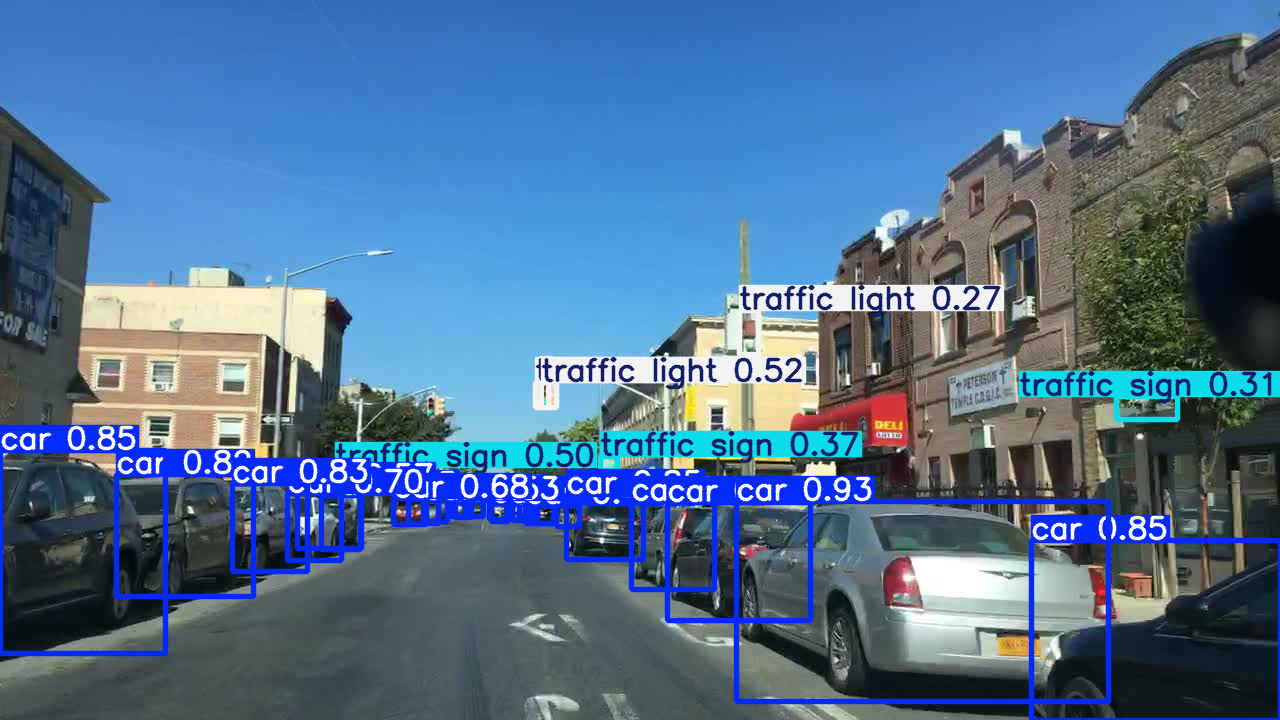

In [29]:
from PIL import Image
from IPython.display import display
results = model1("../data/my_yolo_data/images/test/afd35d01-38f98552.jpg")
img = results[0].plot()
img_rgb = Image.fromarray(img[..., ::-1]) # convert BGR to RGB
display(img_rgb);


image 1/1 c:\Users\marij\M2-UPSACLAY\T6\Computer Vision\cv_object_detection\YOLO\..\data\my_yolo_data\images\test\0ca8467b-6dc2be8a.jpg: 384x640 6 cars, 3 traffic signs, 81.7ms
Speed: 1.4ms preprocess, 81.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


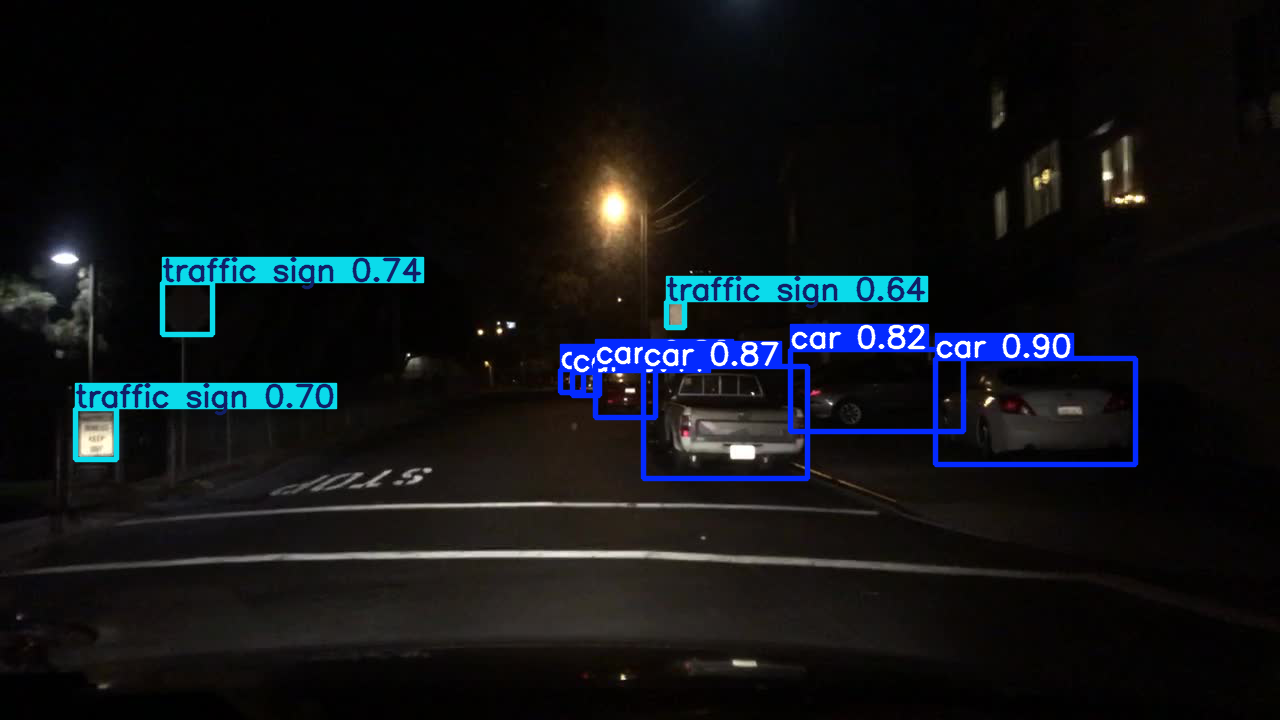

In [ ]:
results = model1("../data/my_yolo_data/images/test/0ca8467b-6dc2be8a.jpg")
img = results[0].plot()
img_rgb = Image.fromarray(img[..., ::-1]) # convert BGR to RGB
display(img_rgb);


image 1/1 c:\Users\marij\M2-UPSACLAY\T6\Computer Vision\cv_object_detection\YOLO\..\data\my_yolo_data\images\test\a5627b20-b87e6506.jpg: 384x640 2 cars, 4 traffic signs, 3 traffic lights, 1 person, 59.3ms
Speed: 1.7ms preprocess, 59.3ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


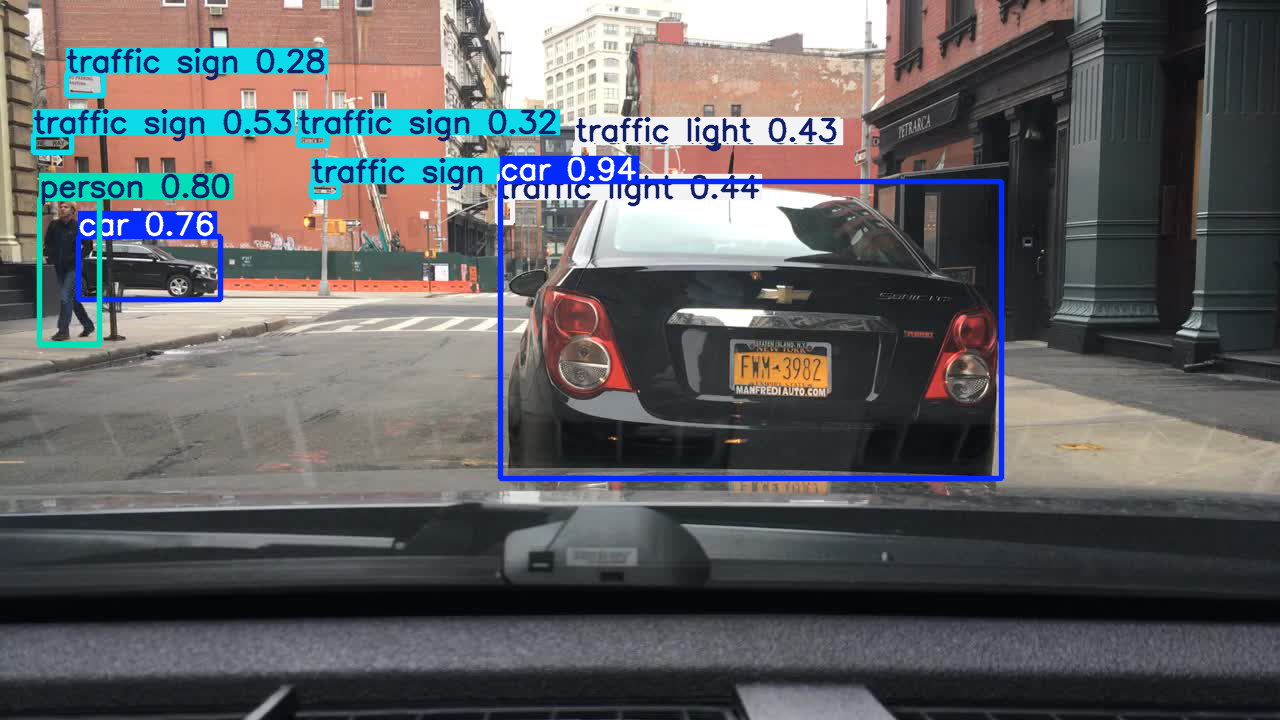

In [31]:
results = model1("../data/my_yolo_data/images/test/a5627b20-b87e6506.jpg")
img = results[0].plot()
img_rgb = Image.fromarray(img[..., ::-1]) # convert BGR to RGB
display(img_rgb);


image 1/1 c:\Users\marij\M2-UPSACLAY\T6\Computer Vision\cv_object_detection\YOLO\..\data\my_yolo_data\images\test\713185ac-e96d92c6.jpg: 384x640 6 cars, 1 traffic sign, 1 traffic light, 5 persons, 49.9ms
Speed: 2.0ms preprocess, 49.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


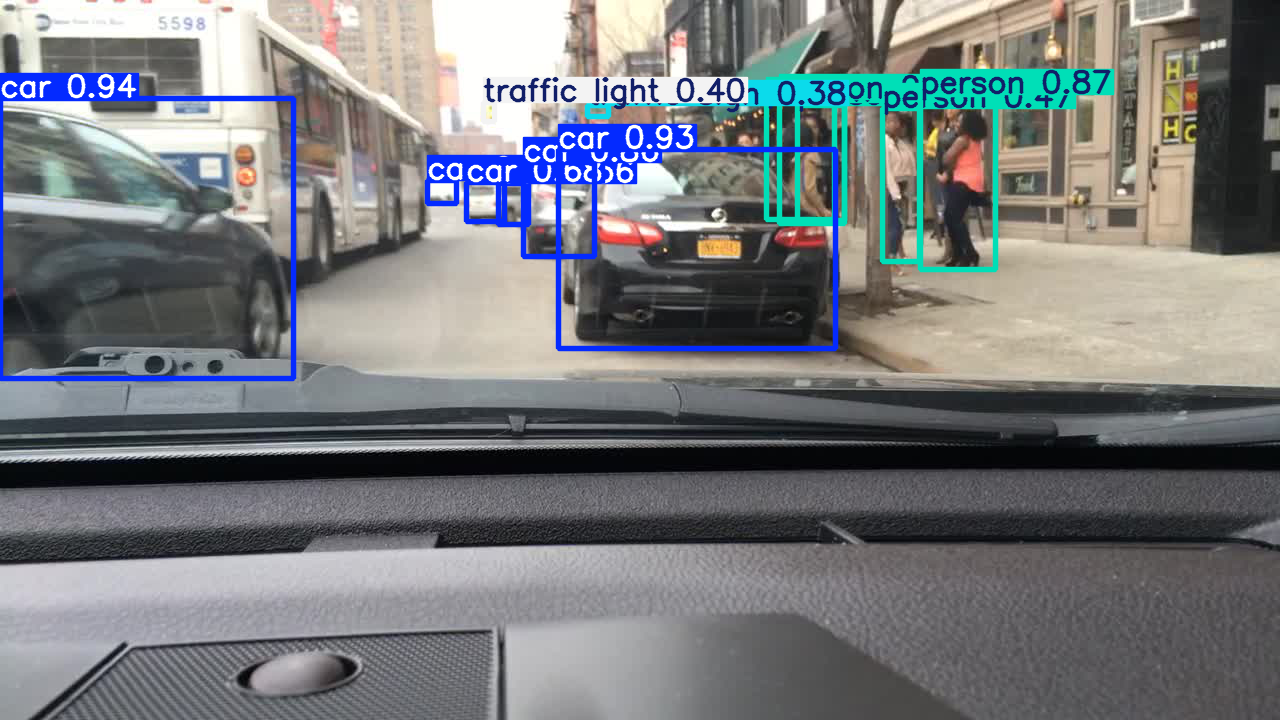

In [32]:
results = model1("../data/my_yolo_data/images/test/713185ac-e96d92c6.jpg")
img = results[0].plot()
img_rgb = Image.fromarray(img[..., ::-1]) # convert BGR to RGB
display(img_rgb);